In [1]:
from IPython.display import display, HTML
display(HTML("<style>div.container { width:100% !important; }</style>"))

# 이미지 변환

## 기하 변환

## 크기 변환

### 입력 영상을 기준으로 반복 실행

In [2]:
def scale_nogood(img, scale_x=1, scale_y=1):
    height, width = img.shape
    img_ = np.zeros((int(height*scale_y), int(width*scale_x)),
                    dtype=np.uint8)
    for y in range(height):
        for x in range(width):
            try:
                img_[int(y*scale_y), int(x*scale_x)] = img[y, x]
            except:
                pass
    return img_

In [3]:
import cv2
import numpy as np
img = cv2.imread("images/lena.jpg", cv2.IMREAD_GRAYSCALE)

result = scale_nogood(img, 0.5, 0.5)

cv2.imshow('Origin', img)
cv2.imshow('Scale NG', result)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [4]:
import cv2
img = cv2.imread("images/lena.jpg", cv2.IMREAD_GRAYSCALE)

result = scale_nogood(img, 1.5, 1.0)

cv2.imshow('Origin', img)
cv2.imshow('Scale NG', result)
cv2.waitKey(0)
cv2.destroyAllWindows()

### 출력영상을 기준으로 반복 실행

In [5]:
import numpy as np

def scale_nogood2(img, scale_x=1, scale_y=1):
    height, width = img.shape
    height_n, width_n = int(height*scale_y), int(width*scale_x)
    img_ = np.zeros((height_n, width_n), dtype=np.uint8)
    for y in range(height_n):
        for x in range(width_n):
            img_[y, x] = img[int(y/scale_y), int(x/scale_x)]

    return img_

In [6]:
import cv2
img = cv2.imread("images/lena.jpg", cv2.IMREAD_GRAYSCALE)

result = scale_nogood2(img, 1.5, 1.0)

cv2.imshow('Origin', img)
cv2.imshow('Scale NG', result)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [7]:
import cv2
img = cv2.imread("images/lena.jpg", cv2.IMREAD_GRAYSCALE)

result = scale_nogood2(img, 0.2, 0.2)

cv2.imshow('Origin', img)
cv2.imshow('Scale NG', result)
cv2.waitKey(0)
cv2.destroyAllWindows()

### 보간법
#### nearest

In [8]:
import numpy as np

def scale_nearest(img, scale_x=1, scale_y=1):
    height, width = img.shape
    img_ = np.zeros((int(height*scale_y),int(width*scale_x)), 
                    dtype=np.uint8)
    for y in range(int(height*scale_y)):
        for x in range(int(width*scale_x)):
            try :
                img_[y,x] = img[round(y/scale_y), round(x/scale_x)]
            except:
                pass
    return img_

In [9]:
import cv2

lena_roi = cv2.imread("images/lena_roi.jpg", cv2.IMREAD_GRAYSCALE)

cv2.imshow('Lena ROI', lena_roi)
cv2.imshow('Scale Nearest', scale_nearest(lena_roi, 3, 3))
cv2.waitKey(0)
cv2.destroyAllWindows()

#### bilinear

In [10]:
import numpy as np

def scale_bilinear(img, scale_x=1, scale_y=1):
    height, width = img.shape
    img_ = np.zeros((int(height*scale_y), int(width*scale_x)), dtype=np.uint8)
    for y in range(int(height*scale_y)):
        for x in range(int(width*scale_x)):
            q = x/scale_x-int(x/scale_x)
            p = y/scale_y-int(y/scale_y)
            try:
                X = int(x/scale_x)
                Y = int(y/scale_y)
                value = (1-p)*(1-q)*img[Y, X] + p*(1-q)*img[Y+1, X] \
                    + (1-p)*q*img[Y, X+1] + p*q*img[Y+1, X+1]
                if value > 255:
                    img_[y, x] = 255
                else:
                    img_[y, x] = int(value)
            except:
                pass
    return img_

In [11]:
import cv2

lena_roi = cv2.imread("images/lena_roi.jpg", cv2.IMREAD_GRAYSCALE)

cv2.imshow('Lena ROI', lena_roi)
cv2.imshow('Scale Nearest', scale_bilinear(lena_roi, 3, 3))
cv2.waitKey(0)
cv2.destroyAllWindows()

### maxpool2d

In [12]:
def maxpool2d(img):
    height, width = img.shape
    img_ = np.zeros((int(height/2),int(width/2)), 
                    dtype=np.uint8)
    for y in range(int(height/2)):
        for x in range(int(width/2)):
            try :
                img_[y,x] = np.max(img[2*y:2*y+2, 2*x:2*x+2])
            except:
                pass
    return img_

In [13]:
import cv2

img = cv2.imread("images/lena.jpg", cv2.IMREAD_GRAYSCALE)
cv2.imshow('Nearest 0.5', scale_nearest(img, 0.5, 0.5))
cv2.imshow('Max Pooling', maxpool2d(img))
cv2.waitKey(0)
cv2.destroyAllWindows()

In [14]:
import cv2

img = cv2.imread("images/lena_edge.png", cv2.IMREAD_GRAYSCALE)
cv2.imshow('Nearest 0.5', scale_nearest(img, 0.5, 0.5))
cv2.imshow('Max Pooling', maxpool2d(img))
cv2.waitKey(0)
cv2.destroyAllWindows()

#### cv2.resize()

In [15]:
import numpy as np
A = np.array( [[[ 98, 209,  44],
         [  0, 255, 255],
         [166,  55,  25],
         [148, 219,   0],
         [ 10, 246, 165]],
 
        [[134, 206,   0],
         [179,  82,   0],
         [169, 214,   0],
         [105,   0, 128],
         [160,  57,  58]],
 
        [[169, 115,   0],
         [129, 240,   0],
         [143,  12,  90],
         [  0, 255, 171],
         [ 53,   0, 125]],
 
        [[ 92,   2, 132],
         [137,  33,  94],
         [162, 109,  25],
         [174, 112,   0],
         [181, 180,   0]],
 
        [[166, 123,   0],
         [140, 240,   0],
         [ 41,   0, 141],
         [164, 110,  26],
         [ 97,   7, 125]]], dtype=np.uint8)

In [16]:
import cv2
cv2.imwrite("images/resize_oirgin_5.png", A)

True

In [17]:
import cv2
cv2.imshow('A', A)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [18]:
img = cv2.imread("images/resize_origin_5.png")
print(img)

[[[ 98 209  44]
  [  0 255 255]
  [166  55  25]
  [148 219   0]
  [ 10 246 165]]

 [[134 206   0]
  [179  82   0]
  [169 214   0]
  [105   0 128]
  [160  57  58]]

 [[169 115   0]
  [129 240   0]
  [143  12  90]
  [  0 255 171]
  [ 53   0 125]]

 [[ 92   2 132]
  [137  33  94]
  [162 109  25]
  [174 112   0]
  [181 180   0]]

 [[166 123   0]
  [140 240   0]
  [ 41   0 141]
  [164 110  26]
  [ 97   7 125]]]


In [19]:
cv2.imshow("Origin", img)
cv2.imshow("cv2.INTER_NEAREST", cv2.resize(img, dsize=(100, 100), interpolation=cv2.INTER_NEAREST))
cv2.imshow("cv2.INTER_LINEAR", cv2.resize(img, dsize=(100, 100), interpolation=cv2.INTER_LINEAR))
cv2.imshow("cv2.INTER_LINEAR_EXACT", cv2.resize(img, dsize=(100, 100), interpolation=cv2.INTER_LINEAR_EXACT))
cv2.imshow("cv2.INTER_LANCZOS4", cv2.resize(img, dsize=(100, 100), interpolation=cv2.INTER_LANCZOS4))
cv2.waitKey()
cv2.destroyAllWindows()

In [20]:
img = cv2.imread("images/resize_origin_5.png")
cv2.imwrite("resize-5to100_nearest.png", cv2.resize(img, dsize=(100, 100), interpolation=cv2.INTER_NEAREST))
cv2.imwrite("resize-5to100_linear.png", cv2.resize(img, dsize=(100, 100), interpolation=cv2.INTER_LINEAR))
cv2.imwrite("resize-5to100_linear_exact.png", cv2.resize(img, dsize=(100, 100), interpolation=cv2.INTER_LINEAR_EXACT))
cv2.imwrite("resize-5to100_area.png", cv2.resize(img, dsize=(100, 100), interpolation=cv2.INTER_AREA))
cv2.imwrite("resize-5to100_cubic.png", cv2.resize(img, dsize=(100, 100), interpolation=cv2.INTER_CUBIC))
cv2.imwrite("resize-5to100_lanczos4.png", cv2.resize(img, dsize=(100, 100), interpolation=cv2.INTER_LANCZOS4))

True

In [21]:
import cv2

img = cv2.imread("images/resize_origin_100.png")

cv2.imwrite("resize-100to50_nearest.png", 
            cv2.resize(img, dsize=(50, 50), 
                       interpolation=cv2.INTER_NEAREST))
cv2.imwrite("resize-100to50_linear.png", 
            cv2.resize(img, dsize=(50, 50), 
                       interpolation=cv2.INTER_LINEAR))
cv2.imwrite("resize-100to50_linear_exact.png", 
            cv2.resize(img, dsize=(50, 50), 
                       interpolation=cv2.INTER_LINEAR_EXACT))
cv2.imwrite("resize-100to50_area.png", 
            cv2.resize(img, dsize=(50, 50), 
                       interpolation=cv2.INTER_AREA))
cv2.imwrite("resize-100to50_cubic.png", 
            cv2.resize(img, dsize=(50, 50), 
                       interpolation=cv2.INTER_CUBIC))
cv2.imwrite("resize-100to50_lanczos4.png", 
            cv2.resize(img, dsize=(50, 50), 
                       interpolation=cv2.INTER_LANCZOS4))

True

## 이동

In [22]:
import numpy as np

def translate(img, dist=(0,0)):
    height, width = img.shape[:2]
    img_ = np.zeros(img.shape, dtype=np.uint8)

    for y in range(height):
        for x in range(width):
            X = x + dist[0]
            Y = y + dist[1]
            if (X < 0) | (X >= width) | (Y < 0) | (Y >= height):
                continue
            img_[Y, X] = img[y, x]

    return img_

In [23]:
img = cv2.imread("images/lena.jpg")
cv2.imshow("Origin", img)
cv2.imshow("Translate", translate(img, (100, 50)))
cv2.waitKey()
cv2.destroyAllWindows()

## 회전

### rotate

In [24]:
import numpy as np

def rotate(img, deg=30):
    height, width = img.shape
    img_ = np.zeros(img.shape, dtype=np.uint8)
    theta = np.pi / (180.0 / deg) # degree -> radian
    center_x = int(width/2); center_y = int(height/2)

    for y in range(height):
        for x in range(width):
            X = int((x-center_x)*np.cos(theta) +
                    (y-center_y)*np.sin(theta)) + center_x
            Y = int(-(x-center_x)*np.sin(theta) +
                    (y-center_y)*np.cos(theta)) + center_y
            if (X < 0) | (X >= width) | (Y < 0) | (Y >= height):
                continue
            img_[Y, X] = img[y, x]

    return img_

In [25]:
img = cv2.imread("images/lena-256.jpg", cv2.IMREAD_GRAYSCALE)
cv2.imshow("Origin", img)
cv2.imshow("Rotate", rotate(img))
cv2.waitKey()
cv2.destroyAllWindows()

In [26]:
import numpy as np

def rotate2(img, deg=30):
    height, width = img.shape
    img_ = np.zeros(img.shape, dtype=np.uint8)
    theta = np.pi / (180.0 / deg)  # degree -> radian
    center_x = int(width / 2)
    center_y = int(height / 2)

    for y in range(height):
        for x in range(width):
            X = int((x-center_x)*np.cos(theta) +
                    (y-center_y)*np.sin(theta)) + center_x
            Y = int(-(x-center_x)*np.sin(theta) +
                    (y-center_y)*np.cos(theta)) + center_y
            if (X < 0) | (X >= width) | (Y < 0) | (Y >= height):
                continue
            img_[Y, X] = img[y, x]

    for y in range(1,height-1): # 바깥 화소 처리 제외
        for x in range(1,width-1):
            if img_[y, x] == 0:
                outer = [img_[y-1,x-1], img_[y-1,x], img_[y-1,x+1],
                         img_[y  ,x-1],              img_[y  ,x+1],
                         img_[y+1,x-1], img_[y+1,x], img_[y+1,x+1]]
                img_[y, x] = np.uint8(np.mean(outer))
    return img_

In [27]:
img = cv2.imread("images/lena-256.jpg", cv2.IMREAD_GRAYSCALE)
cv2.imshow("Rotate", rotate2(img))
cv2.waitKey()
cv2.destroyAllWindows()

In [28]:
img = cv2.imread("images/lena.jpg", cv2.IMREAD_GRAYSCALE)
cv2.imshow("Rotate", cv2.rotate(img, cv2.ROTATE_90_COUNTERCLOCKWISE))
cv2.waitKey()
cv2.destroyAllWindows()

### cv2.getRotationMatrix2D()

In [29]:
img = cv2.imread("images/lena.jpg", cv2.IMREAD_GRAYSCALE)

In [30]:
cv2.imshow("Origin", img)
rows, cols = img.shape[:2]
M = cv2.getRotationMatrix2D((rows/2, cols/2), angle=70, scale=1)
cv2.imshow("Rotate", cv2.warpAffine(img, M, (rows, cols)))
cv2.waitKey()
cv2.destroyAllWindows()

### 이동

In [31]:
import numpy as np

def translate(img, dist=(0,0)):
    height, width = img.shape[:2]
    img_ = np.zeros(img.shape, dtype=np.uint8)

    for y in range(height):
        for x in range(width):
            X = x - dist[0]
            Y = y - dist[1]
            if (X < 0) | (X >= width) | (Y < 0) | (Y >= height):
                continue
            img_[Y, X] = img[y, x]

    return img_

## Affine

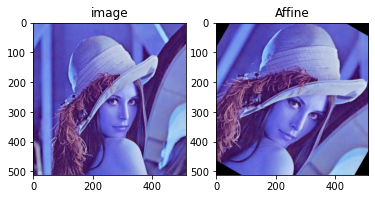

In [32]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('images/lena.jpg')
rows, cols, ch = img.shape

M = cv2.getRotationMatrix2D( (rows/2,cols/2), -30, 1.2)

dst = cv2.warpAffine(img, M, (cols,rows))

plt.subplot(121)
plt.imshow(img)
plt.title('image')

plt.subplot(122)
plt.imshow(dst)
plt.title('Affine')
plt.show()

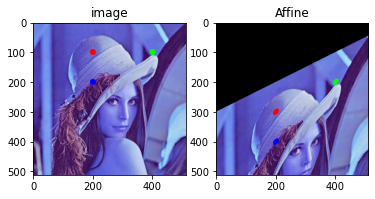

In [33]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('images/lena.jpg')
rows, cols, ch = img.shape

pts1 = np.float32([[200,100],[400,100],[200,200]])
pts2 = np.float32([[200,300],[400,200],[200,400]])

# pts1의 좌표에 표시. Affine 변환 후 이동 점 확인.
cv2.circle(img, (200,100), 10, (255,0,0),-1)
cv2.circle(img, (400,100), 10, (0,255,0),-1)
cv2.circle(img, (200,200), 10, (0,0,255),-1)

M = cv2.getAffineTransform(pts1, pts2)

dst = cv2.warpAffine(img, M, (cols,rows))

plt.subplot(121),plt.imshow(img),plt.title('image')
plt.subplot(122),plt.imshow(dst),plt.title('Affine')
plt.show()

#### 과제
    * 이미지와 이미지와 같은 크기의 변환이미지(빈 이미지)를 윈도우로 출력한 후
    * 원 영상을 출력한 창에서 마우스를 더블클릭한 3 지점을 소스 영상의 좌표로 하고
    * 변환 이미지를 출력한 창에서 마우스를 더블클릭하면 3 지점을 출력 영상의 좌표로 설정 한 후
    * 이미지 변환을 수행하는 파이썬 애플리케이션을 작성하세요.
    * 제출기한 : 월요일 오후 9시까지
    * 소스코드를 메일 본문의 내용으로 복붙해서 hjk7902@gmail.com으로

## Perspective

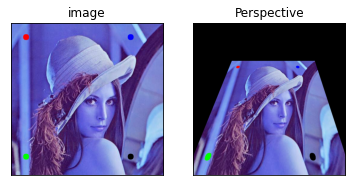

In [34]:
#-*- coding:utf-8 -*-
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('images/lena.jpg')
# [x,y] 좌표점을 4x2의 행렬로 작성
# 좌표점은 좌상->좌하->우상->우하
pts1 = np.float32([[50,50],[50,450],[400,50],[400,450]])

# 좌표의 이동점
pts2 = np.float32([[150,150],[50,450],[350,150],[400,450]])

# pts1의 좌표에 표시. perspective 변환 후 이동 점 확인.
cv2.circle(img, (50,50), 10, (255,0,0),-1)
cv2.circle(img, (50,450), 10, (0,255,0),-1)
cv2.circle(img, (400,50), 10, (0,0,255),-1)
cv2.circle(img, (400,450), 10, (0,0,0),-1)

M = cv2.getPerspectiveTransform(pts1, pts2)
dst = cv2.warpPerspective(img, M, (512,512))

plt.subplot(121),plt.imshow(img),plt.title('image')
plt.xticks([]), plt.yticks([])

plt.subplot(122),plt.imshow(dst),plt.title('Perspective')
plt.xticks([]), plt.yticks([])

plt.show()

## 문서 스캔하기

In [35]:
import cv2 
import numpy as np
from datetime import datetime
from time import sleep

points = np.zeros((4,2), dtype=np.float32)
count = 0

def mouseHandler(event, x, y, flags, param):
    global count
    if event==cv2.EVENT_LBUTTONDOWN:
        cv2.circle(img, (x,y), 5, (0, 0, 255), -1) #반지름 5크기 빨간 점
        cv2.imshow("Capture", img)
        try:
            points[count] = [x, y]
            count += 1
            if count == 4:
                sum_ = points.sum(axis=1)
                diff = np.diff(points, axis=1)

                top_left = points[np.argmin(sum_)]
                bottom_right = points[np.argmax(sum_)]
                top_right= points[np.argmin(diff)]
                bottom_left = points[np.argmax(diff)]

                pts1 = np.float32([top_left, top_right, bottom_right, bottom_left])

                width_bottom = abs(bottom_right[0] - bottom_left[0])
                width_top = abs(top_right[0] - top_left[0])
                height_right = abs(top_right[1] - bottom_right[1])
                height_left = abs(top_left[1] - bottom_left[1])
                
                width = int(max([width_bottom, width_top]))
                height = int(max([height_right, height_left]))
                print(width, height) # 
                # 삼각함수를 이용한 대각선의 길이 계산
#                 w1 = np.sqrt(abs(top_left[0]-top_right[0])**2 + 
#                              abs(top_left[1]-top_right[1])**2)
#                 w2 = np.sqrt(abs(bottom_left[0]-bottom_right[0])**2 + 
#                              abs(bottom_left[1]-bottom_right[1])**2)
#                 width = int(max(w1, w2))
#                 h1 = np.sqrt(abs(top_left[0]-bottom_left[0])**2 + 
#                              abs(top_left[1]-bottom_left[1])**2)
#                 h2 = np.sqrt(abs(top_right[0]-bottom_right[0])**2 + 
#                              abs(top_right[1]-bottom_right[1])**2)
#                 height = int(max(h1, h2))
#                 print(width, height)
                pts2 = np.float32([[0,0], [width-1,0], [width-1,height-1], [0,height-1]])

                M = cv2.getPerspectiveTransform(pts1, pts2)
                
                dst = cv2.warpPerspective(img, M, (width, height))
                cv2.imshow("Capture", img)
                cv2.imshow("Scanned", dst)
        except Exception as e:
            print(e)
                
cap = cv2.VideoCapture(0)
captured = False

if cap.isOpened():
    delay = int(1000 / cap.get(cv2.CAP_PROP_FPS))
    while True:
        ret, img = cap.read()
        if ret:
            cv2.imshow("Capture", img)
            key = cv2.waitKey(delay)
            if key & 0xFF == 27 :
                print("아무 작업도 하지 않고 종료함")
                break 
            elif key == ord('c'): # 캡쳐 시작은 c키를 누르세요.
                captured = True
                break
        else:
            print(ret, img) 
            break
else:
    print("File not opened")

if captured:
    cap.release()
    while True:
        cv2.imshow("Capture", img)
        cv2.setMouseCallback("Capture", mouseHandler)
        key = cv2.waitKey(delay)
        if key & 0xFF == 27 :
            print("ESC Key pressed")
            break

cap.release()
cv2.destroyAllWindows()

File not opened
